In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🌸 Iris Dataset – Description
The Iris dataset is one of the most well-known datasets in statistics and machine learning. It was introduced by Ronald A. Fisher in 1936 in his paper “The use of multiple measurements in taxonomic problems.”

## 📊 Dataset Overview

* Number of rows (samples): 150 flowers
* Number of columns (features): 5
    1. sepal_length – length of the sepal (cm) `float64`
    2. sepal_width – width of the sepal (cm) `float64`
    3. petal_length – length of the petal (cm) `float64`
    4. petal_width – width of the petal (cm) `float64`
    5. species – type of iris flower (Setosa, Versicolor, Virginica) `object`

## 🏷 Classes (Target Variable: species)

* Setosa (50 samples)
* Versicolor (50 samples)
* Virginica (50 samples)

## 🎯 Goal

* To study the relationship between sepal and petal measurements
* To classify flowers into the correct species based on their features

In [2]:
iris = sns.load_dataset("iris") 

In [3]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
iris.duplicated().sum()

1

**Flower can have same measurements.**

In [10]:
iris.index.duplicated().sum()

0

In [14]:
iris["species"] = iris["species"].astype("category")

In [15]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


#### Conclusion:
* Just converted species column datatype (object into category).

**This dataset is already clean.**

## EDA

### Univariate Analysis

In [16]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### sepal_length
**Conclusions:**
* Almost normally distributed.
* No outliers.
* No missing values.

In [17]:
iris["sepal_length"].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [ ]:
iris["sepal_length"].plot(kind="hist",bins=20)

<Axes: ylabel='Density'>

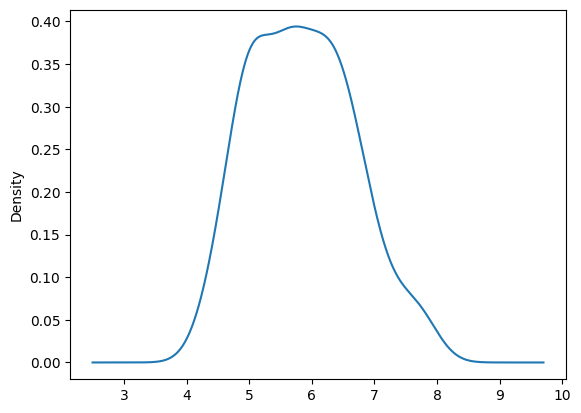

In [18]:
iris["sepal_length"].plot(kind="kde")

In [21]:
iris["sepal_length"].skew()

0.3149109566369728

<Axes: >

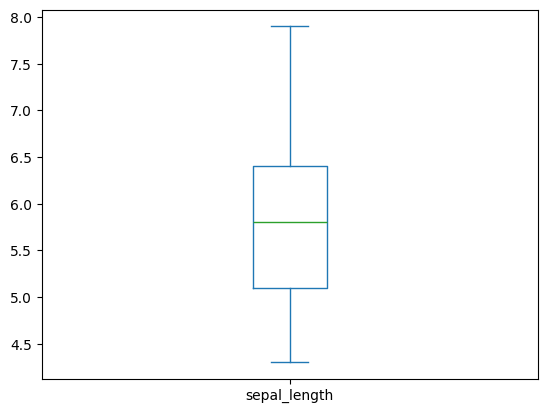

In [19]:
iris["sepal_length"].plot(kind="box")

In [22]:
iris["sepal_length"].isna().sum()

0

#### sepal_width
**Conclusions:**
* Almost normally distributed.
* There 4 outliers.
* No missing values.

In [23]:
iris["sepal_width"].describe()

count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64

<Axes: ylabel='Frequency'>

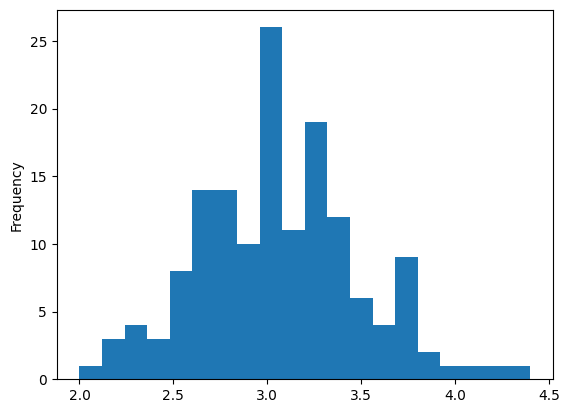

In [55]:
iris["sepal_width"].plot(kind="hist",bins=20)

<Axes: ylabel='Density'>

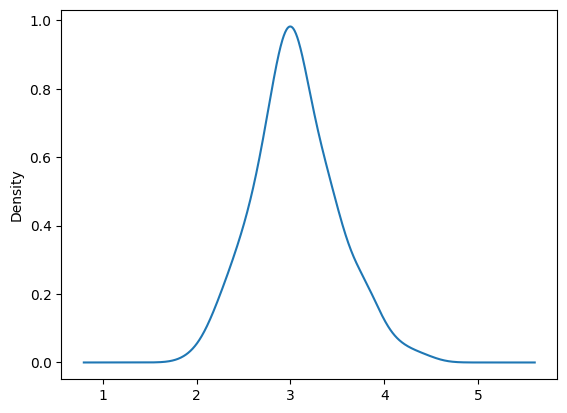

In [24]:
iris["sepal_width"].plot(kind="kde")

In [25]:
iris["sepal_width"].skew()

0.31896566471359966

<Axes: >

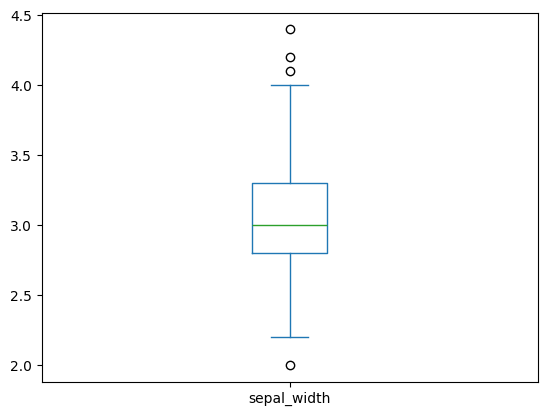

In [26]:
iris["sepal_width"].plot(kind="box")

In [33]:
# highest point in the dataset excluding outliers
Q1 = 2.800000
Q3 = 3.300000
IQR = Q3 - Q1
high = Q3 + 1.5*IQR
# lowest point in the dataset excluding outliers
low = Q1 - 1.5*IQR
print("Highest point in the dataset excluding outliers :",high)
print("Lowest point in the dataset excluding outliers :",low)

Highest point in the dataset excluding outliers : 4.05
Lowest point in the dataset excluding outliers : 2.05


In [35]:
# outliers after highest point
iris[iris["sepal_width"] > 4.05]

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa


In [36]:
# outliers before lowest point
iris[iris["sepal_width"] < 2.05]

,sepal_length,sepal_width,petal_length,petal_width,species
60,5.0,2.0,3.5,1.0,versicolor


In [37]:
iris["sepal_width"].isnull().sum()

0

#### petal_length
**Conclusions:**
* The data is bimodal.
* No outliers.
* No missing values.

In [38]:
iris["petal_length"].describe()

count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal_length, dtype: float64

<Axes: ylabel='Frequency'>

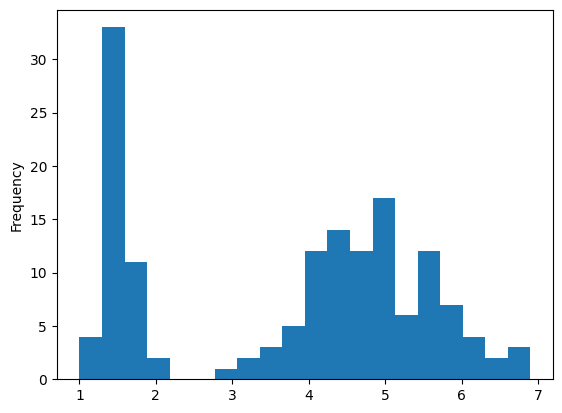

In [52]:
iris["petal_length"].plot(kind="hist",bins=20)

<Axes: ylabel='Density'>

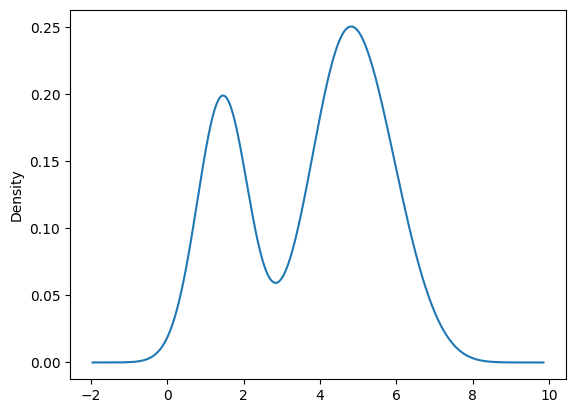

In [39]:
iris["petal_length"].plot(kind="kde")

In [40]:
iris["petal_length"].skew()

-0.27488417975101276

<Axes: >

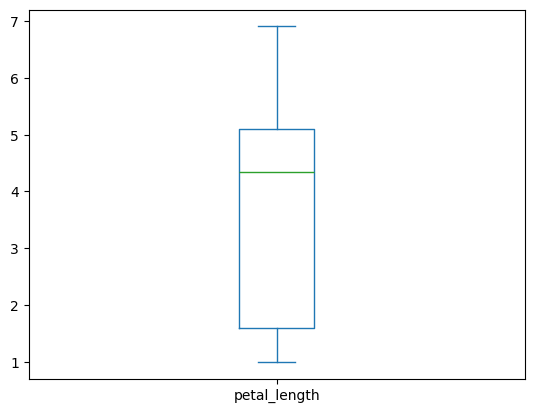

In [41]:
iris["petal_length"].plot(kind="box")

In [42]:
iris["petal_length"].isna().sum()

0

#### petal_width
**Conclusions:**
* The data is bimodal.
* No outliers.
* No missing values.

In [43]:
iris["petal_width"].describe()

count    150.000000
mean       1.199333
std        0.762238
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal_width, dtype: float64

<Axes: ylabel='Frequency'>

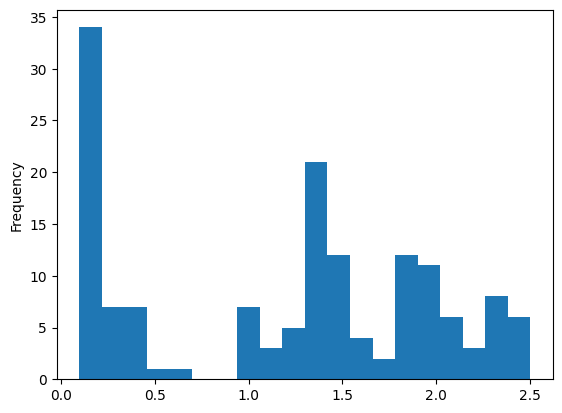

In [50]:
iris["petal_width"].plot(kind="hist",bins=20)

<Axes: ylabel='Density'>

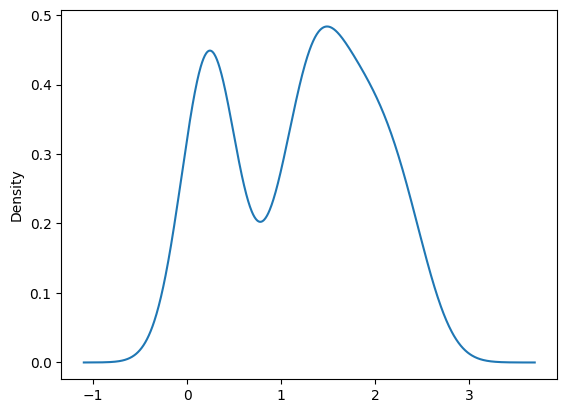

In [44]:
iris["petal_width"].plot(kind="kde")

In [45]:
iris["petal_width"].skew()

-0.10296674764898116

<Axes: >

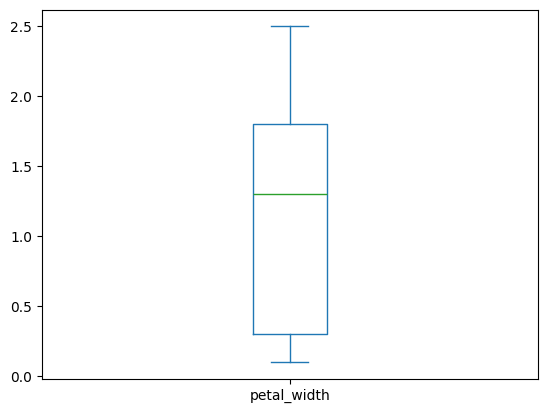

In [46]:
iris["petal_width"].plot(kind="box")

In [47]:
iris["petal_width"].isnull().sum()

0